<a href="https://colab.research.google.com/github/MensureSahin/Hello-World/blob/master/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Let's read the dataset and get a copy of it to avoid any changes to original data
data_original = pd.read_csv('/content/hmeq.csv')
data= data_original.copy()

# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('object').columns.tolist()



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


BAD
Skew : 1.5


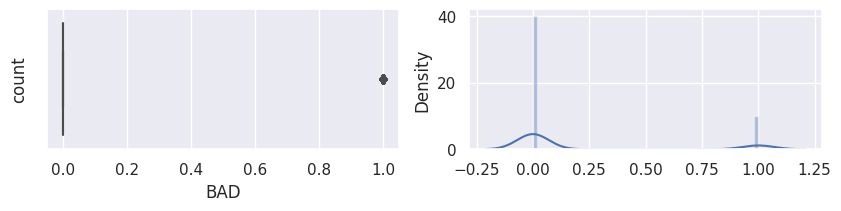

LOAN
Skew : 2.02


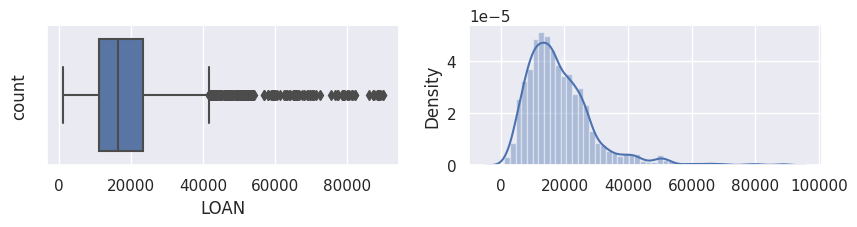

MORTDUE
Skew : 1.81


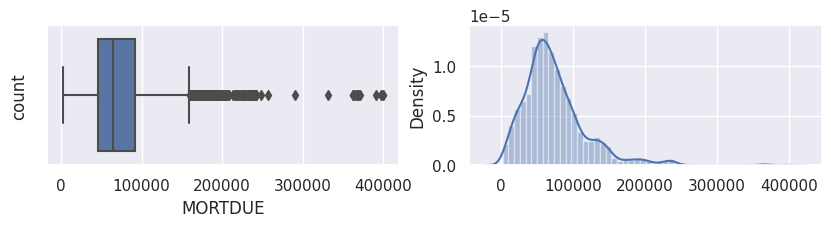

VALUE
Skew : 3.05


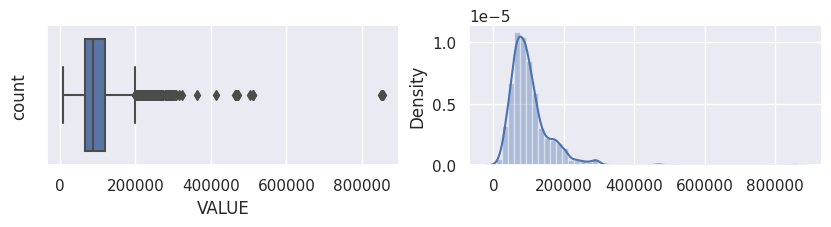

YOJ
Skew : 0.99


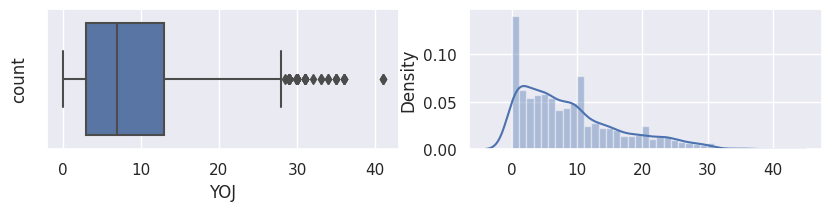

DEROG
Skew : 5.32


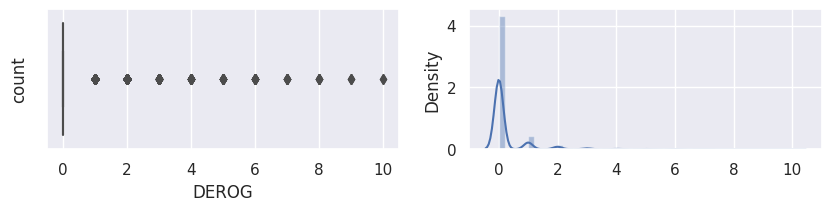

DELINQ
Skew : 4.02


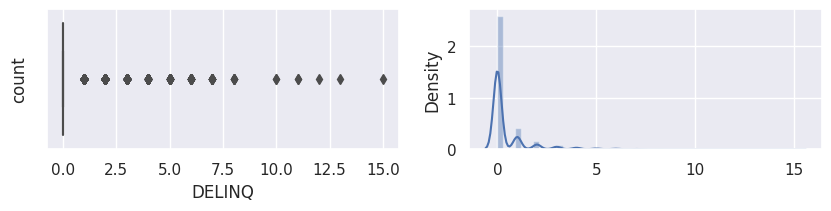

CLAGE
Skew : 1.34


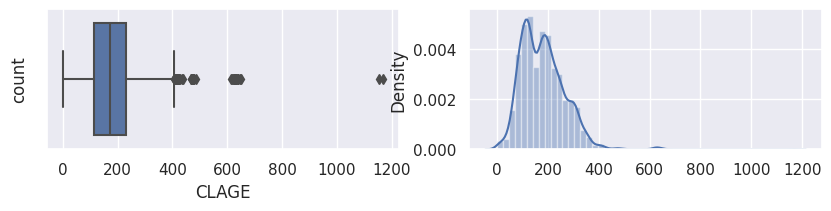

NINQ
Skew : 2.62


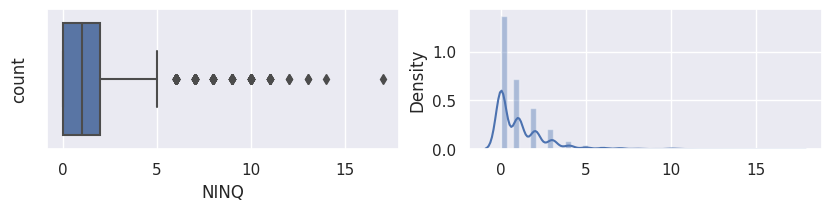

CLNO
Skew : 0.78


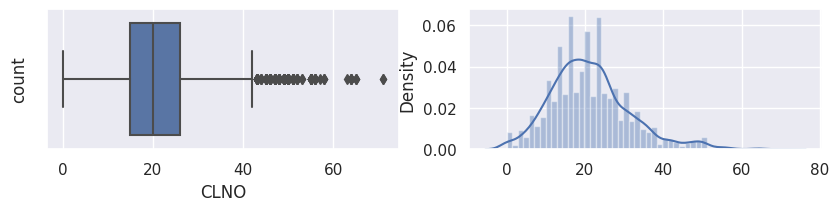

DEBTINC
Skew : 2.85


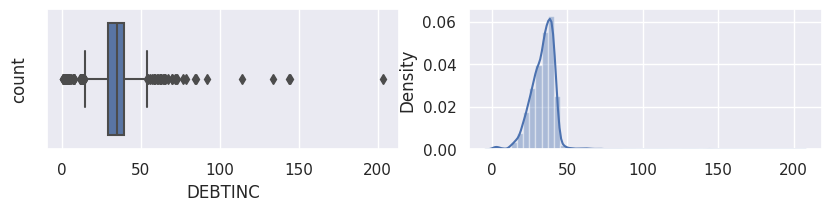

In [8]:
# Let's see the distributions for numeric features

for col in num_data:
    print(col)
    print('Skew :',round(data[col].skew(), 2))
    plt.figure(figsize = (10,4))
    plt.subplot(2,2,1)
    sns.boxplot(x = data[col])
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.distplot(x=data[col])
    plt.show()

We see that there are outliers in HMEQ Dataset. In fraud detection problems, outliers may represent fraudulent activities that need to be detected, so it may be important to keep them in the analysis. In these cases, removing outliers can result in a loss of information and a decrease in the performance of the fraud detection model. So,I'm keeping them in.


In [9]:
# do we have missing values?
data.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Imputing Missing Values
# Fill numeric columns with median (since all the numeric features are right skewed and have outliers)
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [11]:
data.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [12]:
# Split into features and target
X = data.drop(['BAD'], axis=1)
y = data['BAD']


# One-hot encode categorical features
X = pd.get_dummies(X)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [13]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    LGBMClassifier()
]

# Define the stratified KFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Evaluate each classifier using cross-validation
results = {}
for clf in classifiers:
    scores = cross_validate(clf, X_scaled, y, cv=skf, scoring=scoring)
    results[clf.__class__.__name__] = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision': np.mean(scores['test_precision']),
        'recall': np.mean(scores['test_recall']),
        'f1': np.mean(scores['test_f1']),
        'roc_auc': np.mean(scores['test_roc_auc'])
    }

# Print the results in a table
print('{:<30} {:<10} {:<10} {:<10} {:<10} {:<10}'.format(
    'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'))
for clf_name, clf_scores in results.items():
    print('{:<30} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}'.format(
        clf_name, clf_scores['accuracy'], clf_scores['precision'],
        clf_scores['recall'], clf_scores['f1'], clf_scores['roc_auc']))

# Determine the best performing model based on the mean F1-score
best_model = max(results, key=lambda x: results[x]['recall'])
print(f'\nThe best performing model is {best_model} with a recall of {results[best_model]["recall"]:.2f}.')


Classifier                     Accuracy   Precision  Recall     F1-score   AUC-ROC   
LogisticRegression             0.84       0.71       0.32       0.44       0.80      
SVC                            0.88       0.96       0.41       0.57       0.88      
KNeighborsClassifier           0.89       0.98       0.46       0.63       0.92      
DecisionTreeClassifier         0.87       0.68       0.66       0.67       0.79      
RandomForestClassifier         0.92       0.89       0.70       0.78       0.97      
GradientBoostingClassifier     0.90       0.84       0.63       0.72       0.93      
XGBClassifier                  0.93       0.86       0.74       0.80       0.97      
AdaBoostClassifier             0.90       0.80       0.64       0.71       0.91      
LGBMClassifier                 0.92       0.85       0.71       0.78       0.96      

The best performing model is XGBClassifier with a recall of 0.74.


In [14]:
# HPYERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER

from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

# Define the classifier
clf = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    "n_estimators": [10, 50, 100, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


# Define the scorer to optimize for recall
scorer = make_scorer(recall_score)

# Define the stratified k-fold cross-validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=skf, scoring=scorer)
grid_search.fit(X_scaled, y)

# Print the best hyperparameters and the corresponding recall
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Recall: {grid_search.best_score_:.2f}")


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Recall: 0.71


In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Define the classifier
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

# Use cross_val_predict to get the predicted labels for each fold
y_pred = cross_val_predict(clf, X_scaled, y, cv=skf)

# Calculate the confusion matrix for each fold
conf_matrices = []
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Average the confusion matrices across all folds
avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)

# Print the confusion matrix
print(avg_conf_matrix)


[[929.8  24.4]
 [ 71.2 166.6]]


In [16]:
# HPYERPARAMETER TUNING FOR LGBM CLASSIFIER

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'num_leaves': [8, 16, 32],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Define the classifier
clf = LGBMClassifier(random_state=42)

# Define the scoring metric to optimize for
scorer = make_scorer(recall_score)

# Define the stratified k-fold cross-validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(
    clf, param_grid, cv=skf, scoring=scorer, n_jobs=-1
)
grid_search.fit(X_scaled, y)

# Print the best hyperparameters and the corresponding recall score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Recall: {grid_search.best_score_:.2f}")


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 16, 'reg_alpha': 0, 'reg_lambda': 0.5}
Recall: 0.73


In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Define the classifier
clf = LGBMClassifier(max_depth= 5, learning_rate=0.1, num_leaves= 16, reg_alpha=0,n_estimators= 200,reg_lambda=0.5)

# Use cross_val_predict to get the predicted labels for each fold
y_pred = cross_val_predict(clf, X_scaled, y, cv=skf)

# Calculate the confusion matrix for each fold
conf_matrices = []
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Average the confusion matrices across all folds
avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)

# Print the confusion matrix
print(avg_conf_matrix)


[[924.8  29.4]
 [ 63.8 174. ]]


In [18]:
# HPYERPARAMETER TUNING FOR XGB CLASSIFIER

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Define the classifier
clf = XGBClassifier(random_state=42)

# Define the scoring metric to optimize for
scorer = make_scorer(recall_score)

# Define the stratified k-fold cross-validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(
    clf, param_grid, cv=skf, scoring=scorer, n_jobs=-1
)
grid_search.fit(X_scaled, y)

# Print the best hyperparameters and the corresponding recall score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Recall score: {grid_search.best_score_}")


Best hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0}
Recall score: 0.7291777470481864


In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Define the classifier
clf = XGBClassifier(colsample_bytree= 1.0, gamma=0.1, learning_rate=0.1, max_depth= 5, min_child_weight= 1,
n_estimators= 200, reg_alpha= 0, reg_lambda= 0, subsample= 1.0)

# Use cross_val_predict to get the predicted labels for each fold
y_pred = cross_val_predict(clf, X_scaled, y, cv=skf)

# Calculate the confusion matrix for each fold
conf_matrices = []
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Average the confusion matrices across all folds
avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)

# Print the confusion matrix
print(avg_conf_matrix)


[[926.8  27.4]
 [ 64.4 173.4]]
